In [1]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import sys
sys.path.append('../')
import datasets
from utils import *

seed = 2019
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
ds_path = "/viscompfs/users/sawang/ScanNet/data_motion/"
depth_path =  "/viscompfs/users/sawang/ScanNet/data/scans/"
B, H, W = 12, 256, 320

In [3]:
train_filenames = readlines(os.path.join(ds_path, 'train.txt'))
train_dataset = datasets.ScanNetProcDataset(
                            ds_path,
                            train_filenames,
                            H, W,
                            [0, -1, 1],
                            4,
                            is_train=True,
                            img_ext=".jpg")
train_loader = DataLoader(train_dataset, B, True, num_workers=4,
                          pin_memory=True, drop_last=True)

In [4]:
batch = None
for batch_idx, inputs in enumerate(train_loader):
    if batch_idx == 5:
        batch = inputs
        break

In [5]:
print(batch.keys())

dict_keys([('K', 0), ('inv_K', 0), ('K', 1), ('inv_K', 1), ('K', 2), ('inv_K', 2), ('K', 3), ('inv_K', 3), ('color', -1, 0), ('color', -1, 1), ('color', -1, 2), ('color', -1, 3), ('color', 0, 0), ('color', 0, 1), ('color', 0, 2), ('color', 0, 3), ('color', 1, 0), ('color', 1, 1), ('color', 1, 2), ('color', 1, 3), ('color_aug', -1, 0), ('color_aug', -1, 1), ('color_aug', -1, 2), ('color_aug', -1, 3), ('color_aug', 0, 0), ('color_aug', 0, 1), ('color_aug', 0, 2), ('color_aug', 0, 3), ('color_aug', 1, 0), ('color_aug', 1, 1), ('color_aug', 1, 2), ('color_aug', 1, 3)])


In [6]:
# check intrinsics
print(batch[('K', 0)].shape)
print(batch[('K', 0)].dtype)
for i in range(4):
    print(batch[('K', i)][0, :, :], '\n')

torch.Size([12, 4, 4])
torch.float32
tensor([[288.9353,   0.0000, 159.9383,   0.0000],
        [  0.0000, 309.4712, 127.9339,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[144.4677,   0.0000,  79.9691,   0.0000],
        [  0.0000, 154.7356,  63.9669,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[72.2338,  0.0000, 39.9846,  0.0000],
        [ 0.0000, 77.3678, 31.9835,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 

tensor([[36.1169,  0.0000, 19.9923,  0.0000],
        [ 0.0000, 38.6839, 15.9917,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 



In [7]:
# check inverse intrinsics
print(batch[('inv_K', 0)].shape)
print(batch[('inv_K', 0)].dtype)
for i in range(4):
    print(batch[('inv_K', i)][0, :, :], '\n')

print('K * K_inv:')
print(batch[('inv_K', 0)][1, :, :] @ batch[('K', 0)][1, :, :])

torch.Size([12, 4, 4])
torch.float32
tensor([[ 3.4610e-03, -1.1258e-10, -5.5354e-01,  0.0000e+00],
        [-3.5937e-11,  3.2313e-03, -4.1340e-01,  0.0000e+00],
        [-1.0444e-10, -1.0425e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 6.9220e-03,  1.0996e-11, -5.5354e-01,  0.0000e+00],
        [ 6.5157e-12,  6.4626e-03, -4.1340e-01,  0.0000e+00],
        [-8.6794e-11,  1.5608e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 1.3844e-02,  1.2635e-09, -5.5354e-01,  0.0000e+00],
        [ 4.6677e-10,  1.2925e-02, -4.1340e-01,  0.0000e+00],
        [-3.4813e-10, -1.4160e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 2.7688e-02, -7.7003e-10, -5.5354e-01,  0.0000e+00],
        [ 3.1315e-10,  2.5851e-02, -4.1340e-01,  0.0000e+00],
        [ 1.8719e-09, -4.3818e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


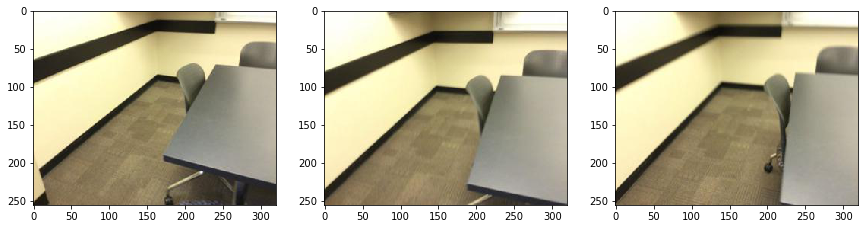

scale 1, shape=(128, 160, 3)


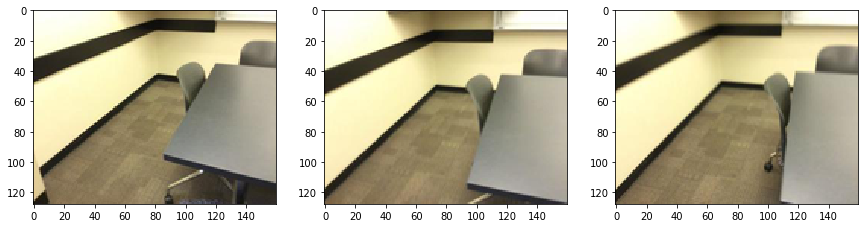

scale 2, shape=(64, 80, 3)


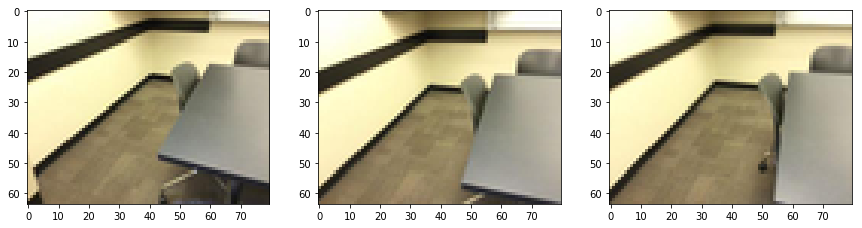

scale 3, shape=(32, 40, 3)


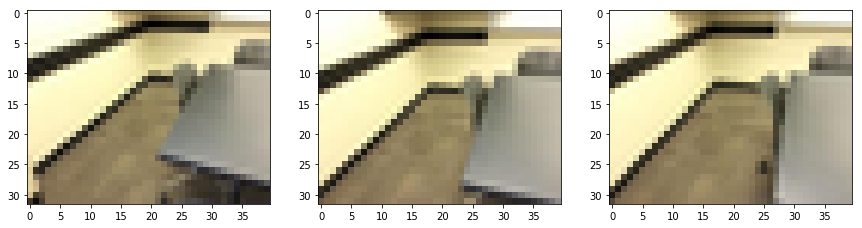

In [8]:
# check color images
print(batch[('color', 0, 0)][11, :, :, :].shape)
print(batch[('color', 0, 0)][11, :, :, :].dtype)

for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


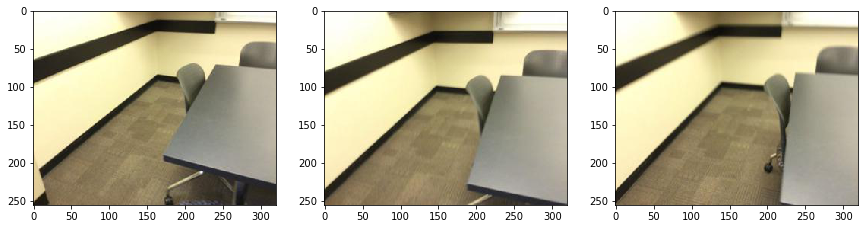

scale 1, shape=(128, 160, 3)


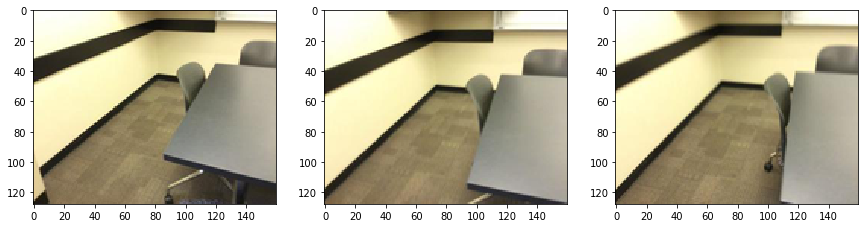

scale 2, shape=(64, 80, 3)


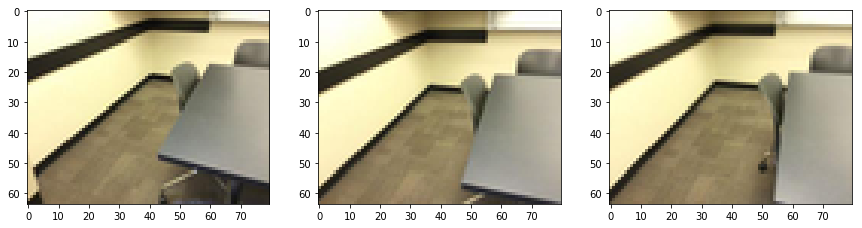

scale 3, shape=(32, 40, 3)


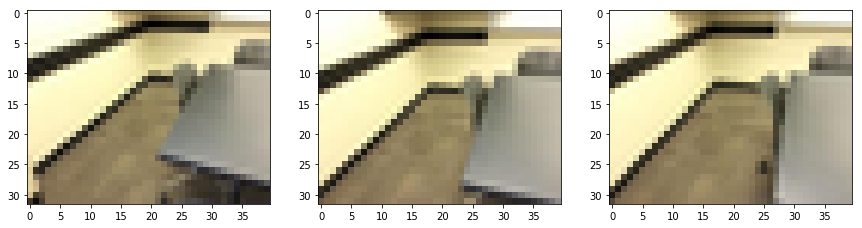

In [9]:
# check augmented color images
print(batch[('color_aug', 0, 0)][11, :, :, :].shape)
print(batch[('color_aug', 0, 0)][11, :, :, :].dtype)
for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color_aug', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

In [10]:
print("depth_gt" in batch)

False


### Test validation loader

In [11]:
val_filenames = readlines(os.path.join(ds_path, 'val.txt'))
val_dataset = datasets.ScanNetProcDataset(
                            ds_path,
                            train_filenames,
                            H, W,
                            [0, -1, 1],
                            4,
                            is_train=False, # set is_train to false when validating
                            gt_path = depth_path,
                            img_ext=".jpg")
val_loader = DataLoader(val_dataset, B, True, num_workers=4,
                          pin_memory=True, drop_last=True)

In [12]:
batch = None
for batch_idx, inputs in enumerate(val_loader):
    if batch_idx == 11:
        batch = inputs
        break

In [13]:
print(batch.keys())

dict_keys([('K', 0), ('inv_K', 0), ('K', 1), ('inv_K', 1), ('K', 2), ('inv_K', 2), ('K', 3), ('inv_K', 3), ('color', -1, 0), ('color', -1, 1), ('color', -1, 2), ('color', -1, 3), ('color', 0, 0), ('color', 0, 1), ('color', 0, 2), ('color', 0, 3), ('color', 1, 0), ('color', 1, 1), ('color', 1, 2), ('color', 1, 3), ('color_aug', -1, 0), ('color_aug', -1, 1), ('color_aug', -1, 2), ('color_aug', -1, 3), ('color_aug', 0, 0), ('color_aug', 0, 1), ('color_aug', 0, 2), ('color_aug', 0, 3), ('color_aug', 1, 0), ('color_aug', 1, 1), ('color_aug', 1, 2), ('color_aug', 1, 3), 'depth_gt'])


In [14]:
# check intrinsics
print(batch[('K', 0)].shape)
print(batch[('K', 0)].dtype)
for i in range(4):
    print(batch[('K', i)][0, :, :], '\n')

torch.Size([12, 4, 4])
torch.float32
tensor([[288.9353,   0.0000, 159.9383,   0.0000],
        [  0.0000, 309.4712, 127.9339,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[144.4677,   0.0000,  79.9691,   0.0000],
        [  0.0000, 154.7356,  63.9669,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[72.2338,  0.0000, 39.9846,  0.0000],
        [ 0.0000, 77.3678, 31.9835,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 

tensor([[36.1169,  0.0000, 19.9923,  0.0000],
        [ 0.0000, 38.6839, 15.9917,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 



In [15]:
# check inverse intrinsics
print(batch[('inv_K', 0)].shape)
print(batch[('inv_K', 0)].dtype)
for i in range(4):
    print(batch[('inv_K', i)][0, :, :], '\n')

print('K * K_inv:')
print(batch[('inv_K', 0)][1, :, :] @ batch[('K', 0)][1, :, :])

torch.Size([12, 4, 4])
torch.float32
tensor([[ 3.4610e-03, -1.1258e-10, -5.5354e-01,  0.0000e+00],
        [-3.5937e-11,  3.2313e-03, -4.1340e-01,  0.0000e+00],
        [-1.0444e-10, -1.0425e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 6.9220e-03,  1.0996e-11, -5.5354e-01,  0.0000e+00],
        [ 6.5157e-12,  6.4626e-03, -4.1340e-01,  0.0000e+00],
        [-8.6794e-11,  1.5608e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 1.3844e-02,  1.2635e-09, -5.5354e-01,  0.0000e+00],
        [ 4.6677e-10,  1.2925e-02, -4.1340e-01,  0.0000e+00],
        [-3.4813e-10, -1.4160e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 2.7688e-02, -7.7003e-10, -5.5354e-01,  0.0000e+00],
        [ 3.1315e-10,  2.5851e-02, -4.1340e-01,  0.0000e+00],
        [ 1.8719e-09, -4.3818e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


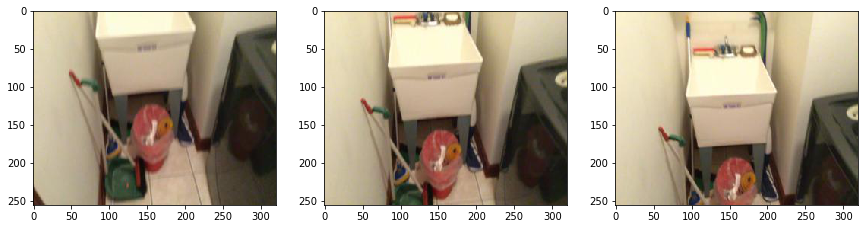

scale 1, shape=(128, 160, 3)


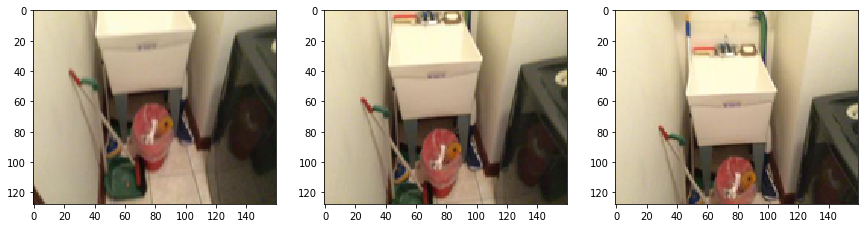

scale 2, shape=(64, 80, 3)


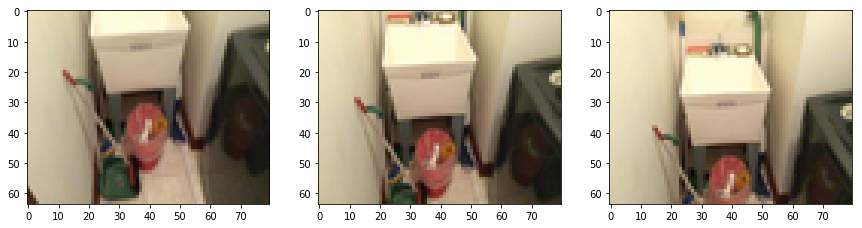

scale 3, shape=(32, 40, 3)


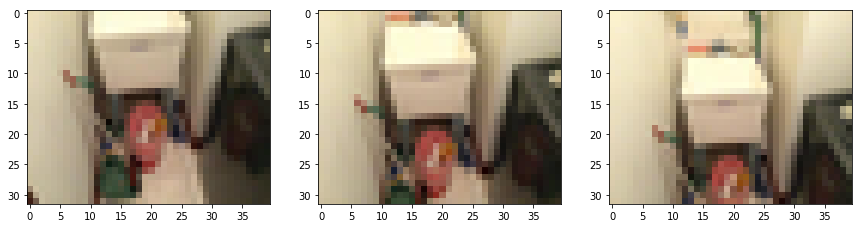

In [16]:
# check color images
print(batch[('color', 0, 0)][11, :, :, :].shape)
print(batch[('color', 0, 0)].dtype)
for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


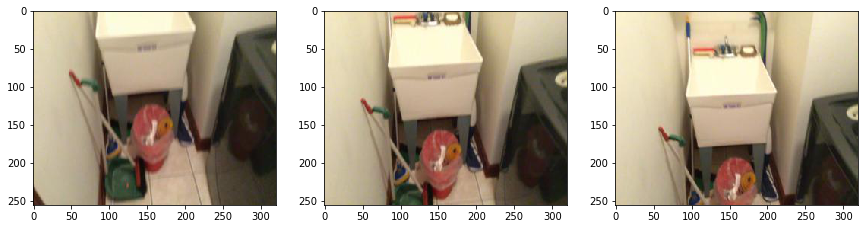

scale 1, shape=(128, 160, 3)


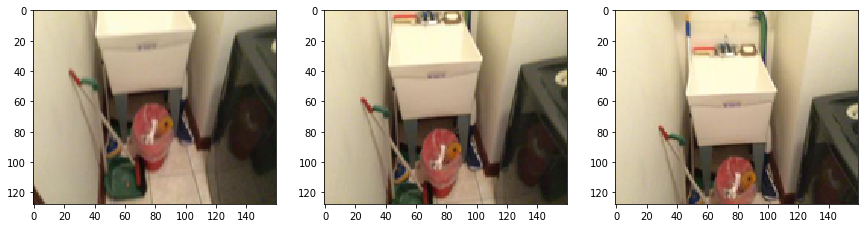

scale 2, shape=(64, 80, 3)


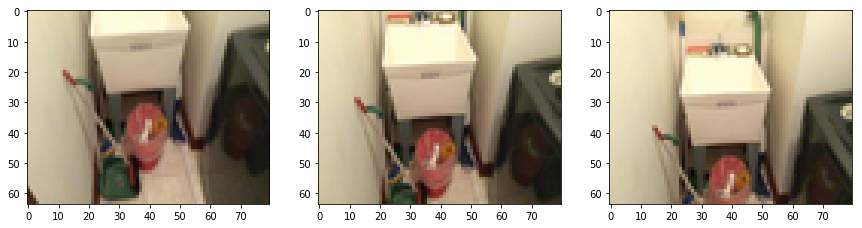

scale 3, shape=(32, 40, 3)


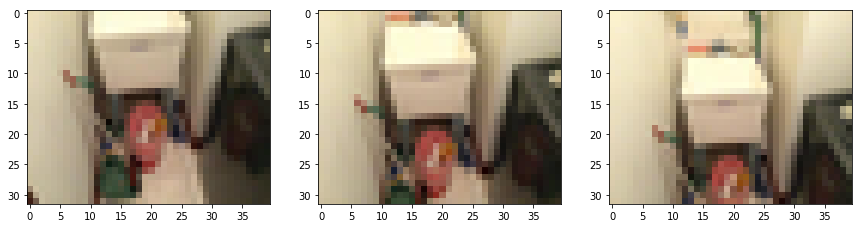

In [17]:
# check augmented color images
print(batch[('color_aug', 0, 0)][11, :, :, :].shape)
print(batch[('color_aug', 0, 0)].dtype)
for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color_aug', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

torch.Size([12, 1, 256, 320])
torch.float32


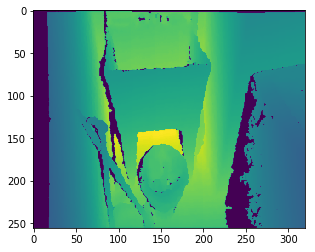

2.071 1.0568881 0.0


In [18]:
# check ground truth depth
dmap = batch['depth_gt'][11, 0, :, :].numpy()
print(batch['depth_gt'].shape)
print(batch['depth_gt'][11, 0, :, :].dtype)
plt.imshow(dmap)
plt.show()
print(dmap.max(), np.mean(dmap), dmap.min())

### Test RAW data loader

In [19]:
test_path = "/viscompfs/users/sawang/ScanNet/data/scans_test/"

In [20]:
test_filenames = readlines(os.path.join(test_path, 'test_list.txt'))
test_dataset = datasets.ScanNetRAWDataset(
                            test_path,
                            train_filenames,
                            H, W,
                            [0, -1, 1],
                            4,
                            is_train=False, # set is_train to false when validating
                            gt_path = test_path,
                            img_ext=".png")

# NOTE: DO NOT SHUFFLE
test_loader = DataLoader(test_dataset, B, shuffle=False, num_workers=4,
                          pin_memory=True, drop_last=True)

In [21]:
batch = None
for batch_idx, inputs in enumerate(val_loader):
    if batch_idx == 7:
        batch = inputs
        break

In [22]:
print(batch.keys())

dict_keys([('K', 0), ('inv_K', 0), ('K', 1), ('inv_K', 1), ('K', 2), ('inv_K', 2), ('K', 3), ('inv_K', 3), ('color', -1, 0), ('color', -1, 1), ('color', -1, 2), ('color', -1, 3), ('color', 0, 0), ('color', 0, 1), ('color', 0, 2), ('color', 0, 3), ('color', 1, 0), ('color', 1, 1), ('color', 1, 2), ('color', 1, 3), ('color_aug', -1, 0), ('color_aug', -1, 1), ('color_aug', -1, 2), ('color_aug', -1, 3), ('color_aug', 0, 0), ('color_aug', 0, 1), ('color_aug', 0, 2), ('color_aug', 0, 3), ('color_aug', 1, 0), ('color_aug', 1, 1), ('color_aug', 1, 2), ('color_aug', 1, 3), 'depth_gt'])


In [23]:
# check intrinsics
print(batch[('K', 0)].shape)
print(batch[('K', 0)].dtype)
for i in range(4):
    print(batch[('K', i)][0, :, :], '\n')

torch.Size([12, 4, 4])
torch.float32
tensor([[288.9353,   0.0000, 159.9383,   0.0000],
        [  0.0000, 309.4712, 127.9339,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[144.4677,   0.0000,  79.9691,   0.0000],
        [  0.0000, 154.7356,  63.9669,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]]) 

tensor([[72.2338,  0.0000, 39.9846,  0.0000],
        [ 0.0000, 77.3678, 31.9835,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 

tensor([[36.1169,  0.0000, 19.9923,  0.0000],
        [ 0.0000, 38.6839, 15.9917,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]]) 



In [24]:
# check inverse intrinsics
print(batch[('inv_K', 0)].shape)
print(batch[('inv_K', 0)].dtype)
for i in range(4):
    print(batch[('inv_K', i)][0, :, :], '\n')

print('K * K_inv:')
print(batch[('inv_K', 0)][1, :, :] @ batch[('K', 0)][1, :, :])

torch.Size([12, 4, 4])
torch.float32
tensor([[ 3.4610e-03, -1.1258e-10, -5.5354e-01,  0.0000e+00],
        [-3.5937e-11,  3.2313e-03, -4.1340e-01,  0.0000e+00],
        [-1.0444e-10, -1.0425e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 6.9220e-03,  1.0996e-11, -5.5354e-01,  0.0000e+00],
        [ 6.5157e-12,  6.4626e-03, -4.1340e-01,  0.0000e+00],
        [-8.6794e-11,  1.5608e-10,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 1.3844e-02,  1.2635e-09, -5.5354e-01,  0.0000e+00],
        [ 4.6677e-10,  1.2925e-02, -4.1340e-01,  0.0000e+00],
        [-3.4813e-10, -1.4160e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]]) 

tensor([[ 2.7688e-02, -7.7003e-10, -5.5354e-01,  0.0000e+00],
        [ 3.1315e-10,  2.5851e-02, -4.1340e-01,  0.0000e+00],
        [ 1.8719e-09, -4.3818e-11,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


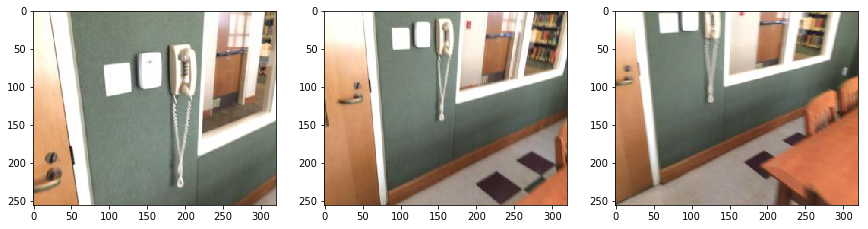

scale 1, shape=(128, 160, 3)


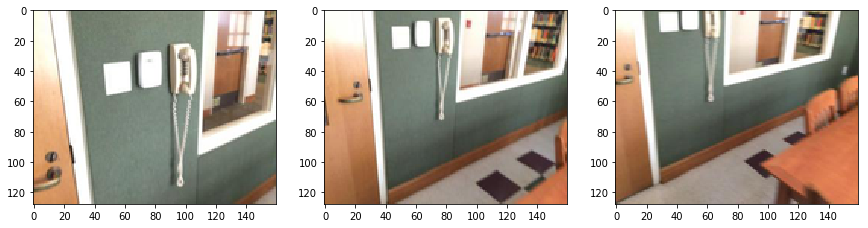

scale 2, shape=(64, 80, 3)


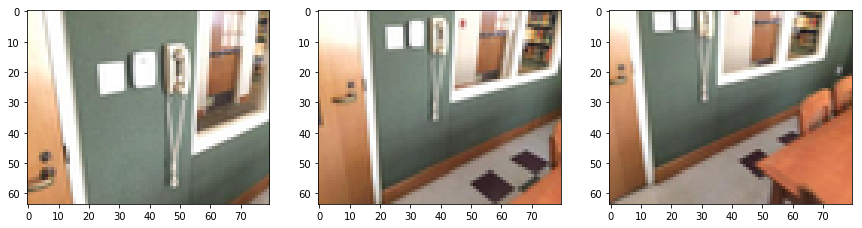

scale 3, shape=(32, 40, 3)


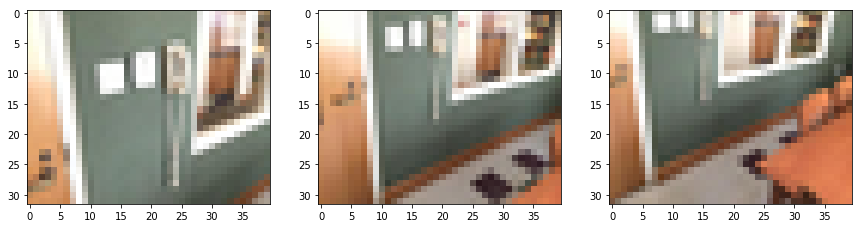

In [25]:
# check color images
print(batch[('color', 0, 0)][11, :, :, :].shape)
print(batch[('color', 0, 0)].dtype)
for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

torch.Size([3, 256, 320])
torch.float32
scale 0, shape=(256, 320, 3)


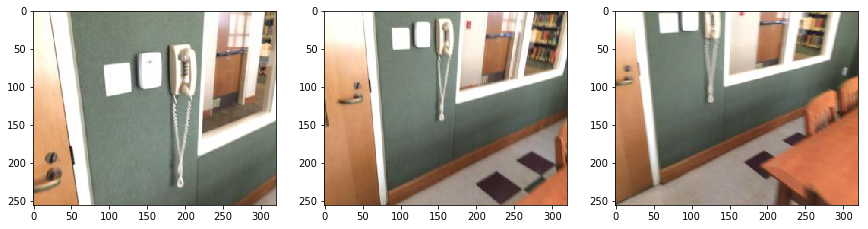

scale 1, shape=(128, 160, 3)


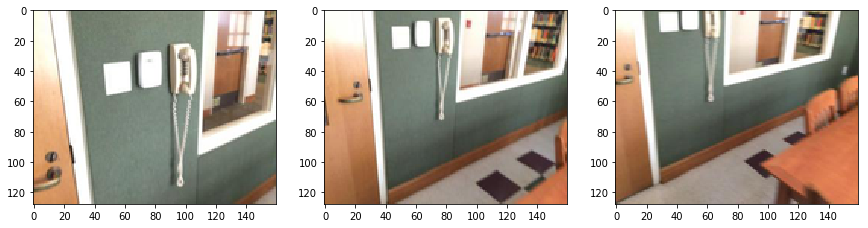

scale 2, shape=(64, 80, 3)


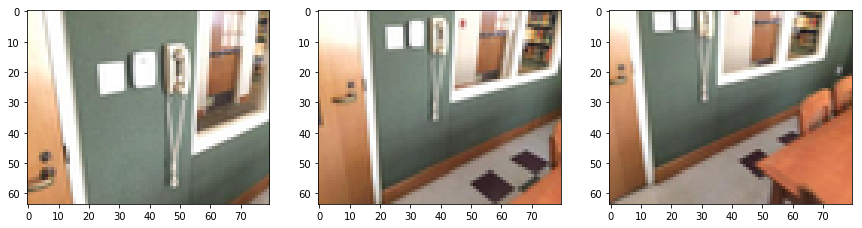

scale 3, shape=(32, 40, 3)


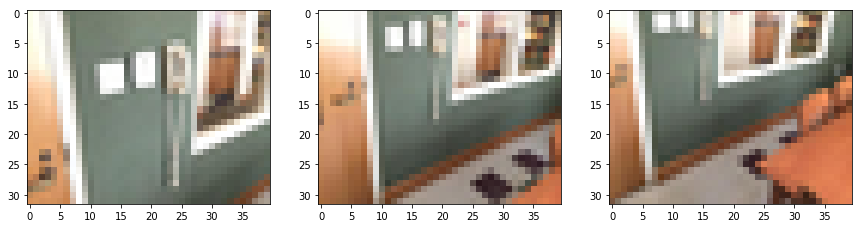

In [26]:
# check augmented color images
print(batch[('color_aug', 0, 0)][11, :, :, :].shape)
print(batch[('color_aug', 0, 0)].dtype)
for scale in range(4):
    fig = plt.figure(figsize=(20, 10))
    for fid in range(-1, 2, 1):
        ax = fig.add_subplot(1, 4, fid+2)
        im = batch[('color_aug', fid, scale)][11, :, :, :].numpy()
        im = np.transpose(im, [1, 2, 0])
        ax.imshow(im)
    print('scale {}, shape={}'.format(scale, im.shape))
    plt.show()

torch.Size([12, 1, 256, 320])
torch.float32


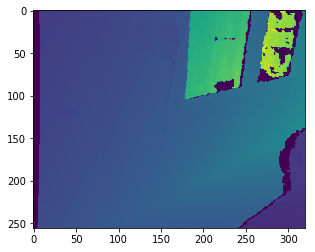

6.348265 1.9394125 0.0


In [27]:
# check ground truth depth
dmap = batch['depth_gt'][11, 0, :, :].numpy()
print(batch['depth_gt'].shape)
print(batch['depth_gt'][11, 0, :, :].dtype)
plt.imshow(dmap)
plt.show()
print(dmap.max(), np.mean(dmap), dmap.min())